In [80]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('Iris.csv')

In [82]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Species'] = encoder.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

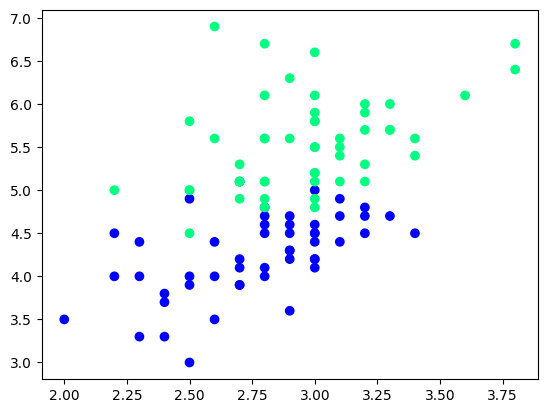

In [86]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [87]:
# 10 rows from trainig
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [88]:
df_train

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
137,3.1,5.5,2
60,2.0,3.5,1
72,2.5,4.9,1
131,3.8,6.4,2
89,2.5,4.0,1
138,3.0,4.8,2
118,2.6,6.9,2
67,2.7,4.1,1
84,3.0,4.5,1


In [89]:
df_val


,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
144,3.3,5.7,2
77,3.0,5.0,1
83,2.7,5.1,1
94,2.7,4.2,1


In [90]:
df_test

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
103,2.9,5.6,2
80,2.4,3.8,1
71,2.8,4.0,1
107,2.9,6.3,2


In [91]:
X_test = df_val.iloc[:,0:2]
Y_test = df_val.iloc[:,-1]


In [92]:
X_test

,SepalWidthCm,PetalLengthCm
117,3.8,6.7
144,3.3,5.7
77,3.0,5.0
83,2.7,5.1
94,2.7,4.2


In [93]:
Y_test

117    2
144    2
77     1
83     1
94     1
Name: Species, dtype: int64

## Case 1 -Bagging

In [94]:
# Data for Tree

df_bag = df_train.sample(8,replace=True) # with replacement hence we see row repeated

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
118,2.6,6.9,2
131,3.8,6.4,2
131,3.8,6.4,2
118,2.6,6.9,2
84,3.0,4.5,1
67,2.7,4.1,1
89,2.5,4.0,1


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [96]:
def evaluate(clf1,X,Y):
    clf1.fit(X,Y)
    plot_tree(clf1)
    plt.show()
    plot_decision_regions(X.values,Y.values,clf=clf1,legend=2)
    Y_pred = clf1.predict(X_test)
    print(accuracy_score(Y_test,Y_pred))
    return clf1

In [97]:
dt1 = DecisionTreeClassifier()

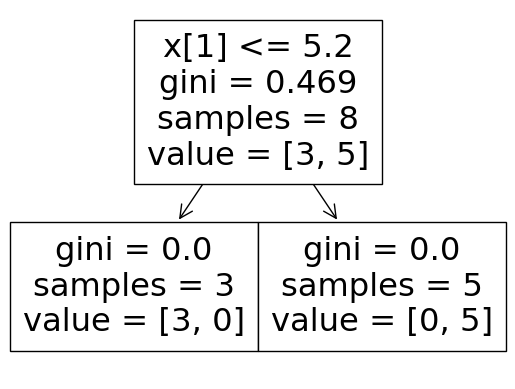

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


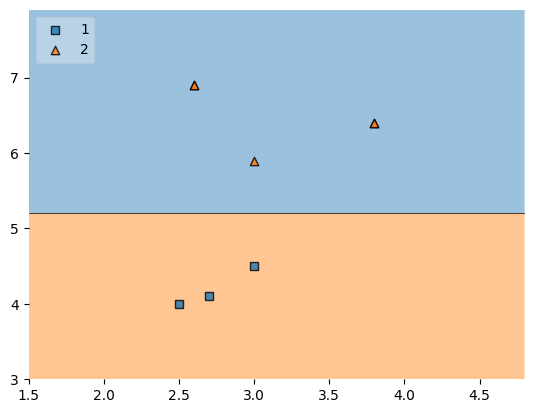

In [98]:
dt1_bag = evaluate(dt1,X,Y)

In [99]:
# Data for 2nd Decision Tree
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
84,3.0,4.5,1
138,3.0,4.8,2
138,3.0,4.8,2
137,3.1,5.5,2
84,3.0,4.5,1
118,2.6,6.9,2
84,3.0,4.5,1
72,2.5,4.9,1


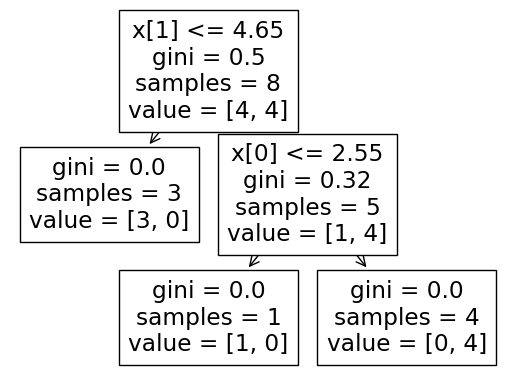

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


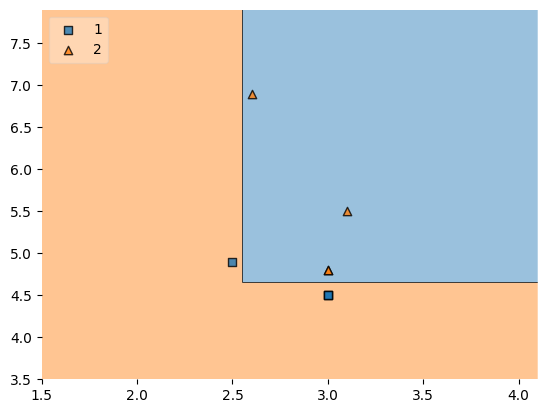

In [100]:
dt2 = DecisionTreeClassifier()
dt2_bag = evaluate(dt2,X,Y)

In [101]:
# Data for 3rd Decision Tree
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
138,3.0,4.8,2
84,3.0,4.5,1
67,2.7,4.1,1
89,2.5,4.0,1
67,2.7,4.1,1
89,2.5,4.0,1
60,2.0,3.5,1


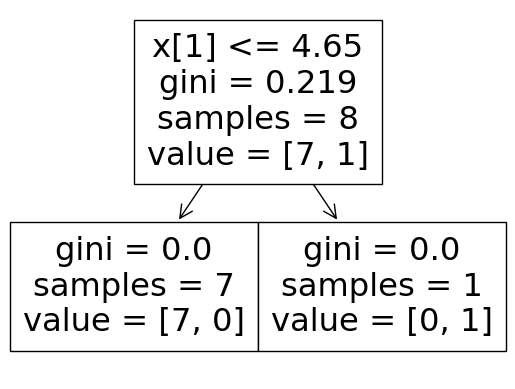

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


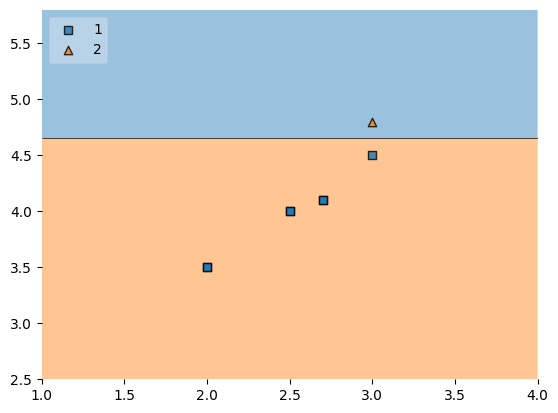

In [102]:
dt3 = DecisionTreeClassifier()
dt3_bag = evaluate(dt3,X,Y)

## Aggeregation
## Prediction Phase

In [103]:
print("Predictor 1 ", dt1_bag.predict(np.array([3.2,4.7]).reshape(1,2)))
print("Predictor 2 ", dt2_bag.predict(np.array([3.2,4.7]).reshape(1,2)))
print("Predictor 3 ", dt3_bag.predict(np.array([3.2,4.7]).reshape(1,2)))

Predictor 1  [1]
Predictor 2  [2]
Predictor 3  [2]


/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [107]:
print("Predictor 1 ", dt1_bag.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2 ", dt2_bag.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3 ", dt3_bag.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1  [1]
Predictor 2  [1]
Predictor 3  [2]


/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Type of Bagging

## Pasting :  Row sampling without replacement

In [108]:
df_train

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
137,3.1,5.5,2
60,2.0,3.5,1
72,2.5,4.9,1
131,3.8,6.4,2
89,2.5,4.0,1
138,3.0,4.8,2
118,2.6,6.9,2
67,2.7,4.1,1
84,3.0,4.5,1


In [109]:
df_train.sample(8) # row repeated

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
131,3.8,6.4,2
84,3.0,4.5,1
89,2.5,4.0,1
67,2.7,4.1,1
138,3.0,4.8,2
137,3.1,5.5,2
102,3.0,5.9,2


## Random Subspaces
## The sample are created by using columns, repated or not repeated.

In [110]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [111]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,116,6.4,3.2,5.3,2.3,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
111,112,6.4,2.7,5.3,1.9,Iris-virginica
116,117,6.5,3.0,5.5,1.8,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [115]:
df1.sample(2,replace=True,axis=1) # 2 columns, axis=1 sampling across column

,SepalWidthCm,PetalLengthCm
115,3.2,5.3
95,3.0,4.2
54,2.8,4.6
81,2.4,3.7
79,2.6,3.5
111,2.7,5.3
116,3.0,5.5
96,2.9,4.2
100,3.3,6.0
68,2.2,4.5


## Random Patches 
## Row and column sampling togather

In [117]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1) # row sampling + column sampling

,PetalWidthCm,PetalWidthCm
81,1.0,1.0
95,1.2,1.2
111,1.9,1.9
68,1.5,1.5
79,1.0,1.0
111,1.9,1.9
81,1.0,1.0
115,2.3,2.3
